In [1]:
import pandas
# load the dataset
dataset = pandas.read_csv('sentiment_results_all.csv')
dataset.head(30)

,Unnamed: 0,Review,Results,Ratings
0,0,"[{'author_name': 'Alan Scott', 'author_url': '...",Positive,4.9
1,1,"[{'author_name': 'GeneviÃ¨ve Ramage', 'author_...",Positive,4.7
2,2,"[{'author_name': 'Adam Popper', 'author_url': ...",Positive,4.9
3,3,"[{'author_name': ""Tony Dell'Osso"", 'author_url...",Positive,4.5
4,4,"[{'author_name': 'Ben Mascioli', 'author_url':...",Positive,4.5
5,5,"[{'author_name': 'Michael B', 'author_url': 'h...",Positive,4.5
6,6,"[{'author_name': 'Pooja Prem Kumar', 'author_u...",Positive,4.5
7,7,"[{'author_name': 'Christopher Paul Beacock', '...",Positive,3.9
8,8,"[{'author_name': 'Brittany Colarossi', 'author...",Positive,4.7
9,9,"[{'author_name': 'Wee Treasures', 'author_url'...",Negative,4.2


In [2]:
#Fetch wordcount for each review
dataset['word_count'] = dataset['Review'].apply(lambda x: len(str(x).split(" ")))
dataset[['Review','word_count']].head()

,Review,word_count
0,"[{'author_name': 'Alan Scott', 'author_url': '...",244
1,"[{'author_name': 'GeneviÃ¨ve Ramage', 'author_...",479
2,"[{'author_name': 'Adam Popper', 'author_url': ...",242
3,"[{'author_name': ""Tony Dell'Osso"", 'author_url...",253
4,"[{'author_name': 'Ben Mascioli', 'author_url':...",229


In [3]:
##Descriptive statistics of word counts
dataset.word_count.describe()

count    10391.000000
mean       318.391878
std        114.672281
min         17.000000
25%        240.000000
50%        309.000000
75%        385.000000
max       1192.000000
Name: word_count, dtype: float64

In [4]:
#Identify common words
freq = pandas.Series(' '.join(dataset['Review']).split()).value_counts()[:20]
freq

and                             97645
the                             97634
a                               53318
'rating':                       51349
'time':                         51349
'relative_time_description':    51349
'text':                         51349
'author_url':                   51344
'profile_photo_url':            51344
'language':                     50972
'en',                           50828
was                             49387
ago',                           48208
to                              47119
{'author_name':                 40958
5,                              36930
I                               34281
is                              32479
of                              29221
for                             28875
dtype: int64

In [5]:
#Identify uncommon words
freq1 =  pandas.Series(' '.join(dataset 
         ['Review']).split()).value_counts()[-20:]
freq1

Jivani',                                                                                                             1
deal!!                                                                                                               1
'https://lh5.ggpht.com/-jH8dzoE0mWU/AAAAAAAAAAI/AAAAAAAAAAA/AOHUqsBSRlQ/s128-c0x00000000-cc-rp-mo-ba4/photo.jpg',    1
quantity/quality                                                                                                     1
soggy..                                                                                                              1
side..",                                                                                                             1
1544157926},                                                                                                         1
Vilcius',                                                                                                            1
1593125045},                                    

In [6]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [7]:
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

In [8]:
##Creating a list of stop words and adding custom stopwords
#stop_words = set(stopwords.words("english"))
stop_words = stopwords.words('english') 
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown","https",":","//","photo", "jpg","url","http","contrib","profile","author","name","ggpht","google","com","map","www","map "," map", "maps","review", "language", "en", "lh", "ienfvjaa ","aaaaaaaaaai", "aaaaaaaaaaa","rating","text","time","description","year","ago","map ","relative","relative ","month", "mo","r", "p", "rp", "cc","week","ba","reviews","review "," review", "months"," month","always"]
#stop_words = stop_words.union(new_words)
stop_words.extend(new_words)
stop_words = set(stop_words)

In [9]:
corpus = []
for i in range(0, len(dataset['Review'])):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [10]:
#View corpus item
corpus[300]

'ali azimi jup eeumy hbiuues yum c x week maharaja upscale restaurant tasteful decor excellent service husband dinner many occasion celebrate anniversary birthday etc look like quality gone last visit ordered nihari nan take unfortunately check order checking cold sitting kitchen hour entire day called said likely u call back find happened never got call back gentleman simply ignored city live many many similar restaurant cheaper price go maharajah simply quality ajay vat osmyo buq iw xag hz c x last second ordering food place ordered today curry quality disappointed pathetic taste upto mark kind money place charging sorry write spending decent amount food placing order manpreet kaur cio b nkbjs zkztvqumnf c x food delicious staff friendly service good loved interior cozy place nice go celebration food great price little high compared quantity reason go limited option vegetarian vegetarian go restaurant want lot option expected well read menu option veg main course actually liked anoth

In [11]:
from pandas import DataFrame

In [12]:
df_sent=DataFrame(corpus,columns=['Review'])
df_sent.to_csv("Reviews_clean_all.csv" )

In [13]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

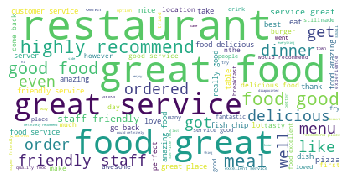

In [15]:
wordcloud = WordCloud(background_color='white',stopwords=stop_words,max_words=100,max_font_size=50, random_state=42).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

## this part is for further text analysis

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import re

In [17]:
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [18]:
list(cv.vocabulary_.keys())[:10]


['alan',
 'scott',
 'au',
 'xa',
 'absolutely',
 'delicious',
 'friendly',
 'genuine',
 'yes',
 'mask']

In [19]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

In [20]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

[Text(0, 0, 'food'),
 Text(0, 0, 'great'),
 Text(0, 0, 'good'),
 Text(0, 0, 'service'),
 Text(0, 0, 'place'),
 Text(0, 0, 'friendly'),
 Text(0, 0, 'restaurant'),
 Text(0, 0, 'staff'),
 Text(0, 0, 'delicious'),
 Text(0, 0, 'amazing'),
 Text(0, 0, 'back'),
 Text(0, 0, 'best'),
 Text(0, 0, 'nice'),
 Text(0, 0, 'would'),
 Text(0, 0, 'go'),
 Text(0, 0, 'price'),
 Text(0, 0, 'week'),
 Text(0, 0, 'well'),
 Text(0, 0, 'recommend'),
 Text(0, 0, 'meal')]

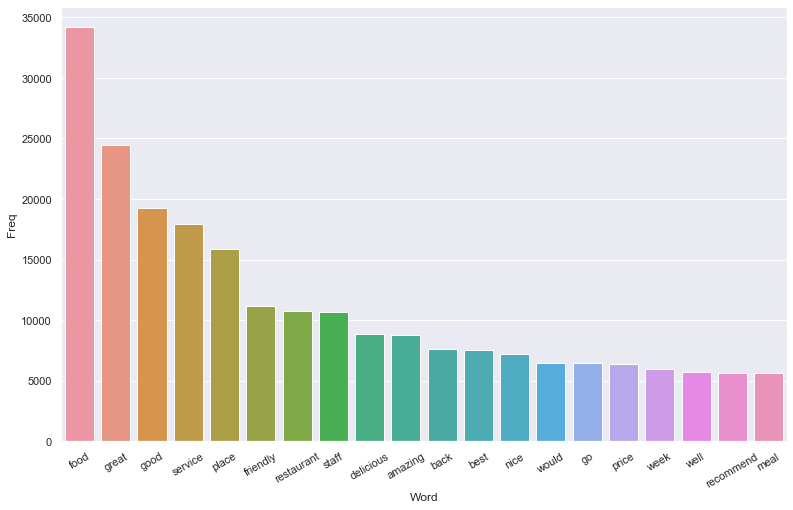

In [21]:
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [22]:
g.figure.savefig("output.png")
#g.savefig('foo.png',dpi=400)
#g.show()

In [23]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [24]:
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

             Bi-gram  Freq
0         great food  3346
1         food great  2580
2   highly recommend  2334
3      great service  2325
4          good food  2194
5          food good  2160
6     friendly staff  1948
7     staff friendly  1589
8      service great  1540
9   friendly service  1475
10           go back  1379
11       great place  1334
12    food delicious  1304
13      food service  1302
14         fish chip  1269
15       really good  1239
16  customer service  1148
17      amazing food  1132
18      food amazing  1120
19      good service  1106


[Text(0, 0, 'great food'),
 Text(0, 0, 'food great'),
 Text(0, 0, 'highly recommend'),
 Text(0, 0, 'great service'),
 Text(0, 0, 'good food'),
 Text(0, 0, 'food good'),
 Text(0, 0, 'friendly staff'),
 Text(0, 0, 'staff friendly'),
 Text(0, 0, 'service great'),
 Text(0, 0, 'friendly service'),
 Text(0, 0, 'go back'),
 Text(0, 0, 'great place'),
 Text(0, 0, 'food delicious'),
 Text(0, 0, 'food service'),
 Text(0, 0, 'fish chip'),
 Text(0, 0, 'really good'),
 Text(0, 0, 'customer service'),
 Text(0, 0, 'amazing food'),
 Text(0, 0, 'food amazing'),
 Text(0, 0, 'good service')]

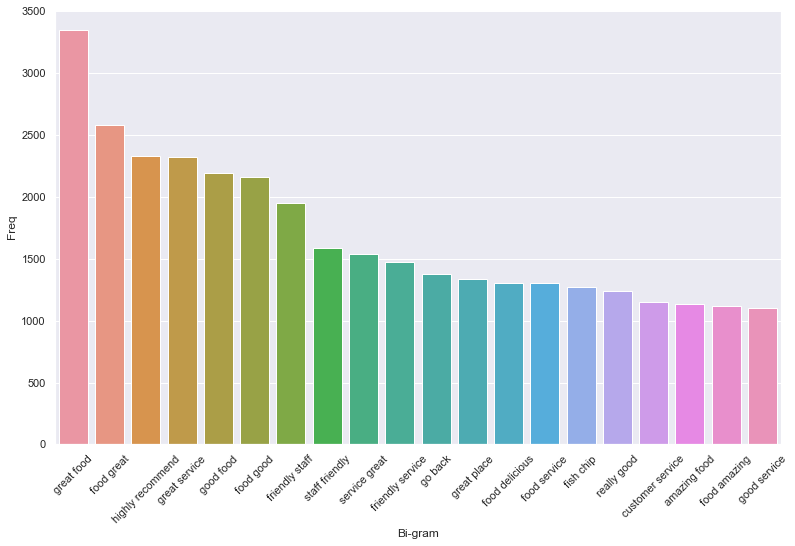

In [25]:
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

In [26]:
h.figure.savefig("output_bi.png")


                      Tri-gram  Freq
0           food great service   676
1             great food great   560
2       would highly recommend   372
3           service great food   360
4   would definitely recommend   343
5       highly recommend place   297
6           definitely go back   271
7         staff super friendly   270
8         definitely come back   261
9            food good service   252
10            food really good   251
11                wait go back   251
12              good food good   242
13         food friendly staff   234
14           service good food   232
15         great service great   227
16             food good price   222
17          great food service   212
18            food great price   211
19       food friendly service   201


[Text(0, 0, 'food great service'),
 Text(0, 0, 'great food great'),
 Text(0, 0, 'would highly recommend'),
 Text(0, 0, 'service great food'),
 Text(0, 0, 'would definitely recommend'),
 Text(0, 0, 'highly recommend place'),
 Text(0, 0, 'definitely go back'),
 Text(0, 0, 'staff super friendly'),
 Text(0, 0, 'definitely come back'),
 Text(0, 0, 'food good service'),
 Text(0, 0, 'food really good'),
 Text(0, 0, 'wait go back'),
 Text(0, 0, 'good food good'),
 Text(0, 0, 'food friendly staff'),
 Text(0, 0, 'service good food'),
 Text(0, 0, 'great service great'),
 Text(0, 0, 'food good price'),
 Text(0, 0, 'great food service'),
 Text(0, 0, 'food great price'),
 Text(0, 0, 'food friendly service')]

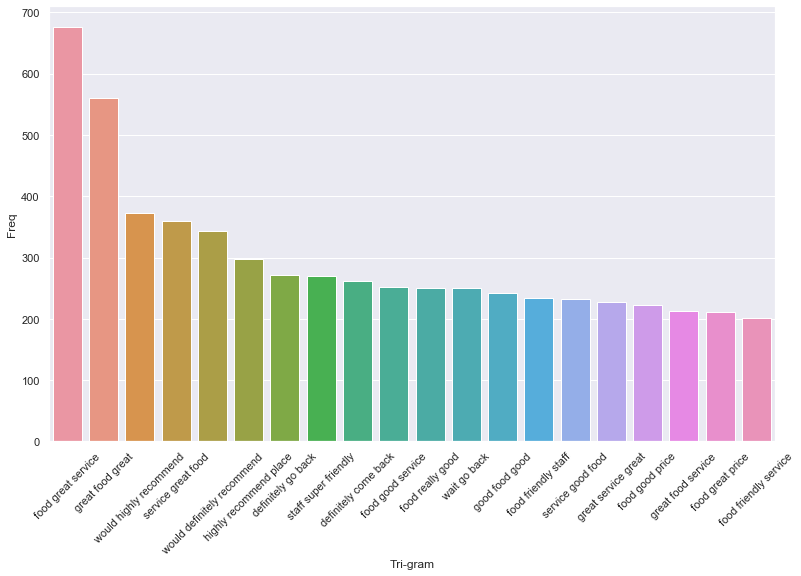

In [27]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [28]:
j.figure.savefig("output_tri.png")


# this section is to extract important or key words using Tfid function.
 TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()

 This just test the model for one row of text for analysis

In [30]:
# fetch document for which keywords needs to be extracted
doc=corpus[40]

In [31]:
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [32]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

In [33]:
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [34]:
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)

In [35]:
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
tim burling hjuhdww kqa q ktdhuoic c x year great breakfast small town business old charm best owner really nice great atmosphere anya roz cjqbaiz io cabytvj hpc c x incredible service food made much love good place quick bite mini variety store restaurant convenient john g ozcs u qg tm gddbjmty c x kind strange breakfast convenience store get past good owner nice continue go back solely reason babak g zwpkofxb xq jnnm axm c x year good quality food quiet relaxing siobhan murphy tlks gomdai eiyenqish e c x friendly happy place thank

Keywords:
store 0.212
happy place 0.182
much love 0.181
good owner 0.18
convenience store 0.179


 this is to run the whole dataset

In [36]:
keyword_list=list(keywords)
keywords_data=list(keywords.values())


In [37]:
doc=corpus
keyword_list=[]
keywords_data=[]

In [38]:
for i in range(0,len(doc)):
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc[i]]))
    sorted_items=sort_coo(tf_idf_vector.tocoo())
    keywords=extract_topn_from_vector(feature_names,sorted_items,5)
    keyword_list.append(list(keywords))
    keywords_data.append(list(keywords.values()))


In [39]:
df_key=DataFrame(keyword_list,columns=[' key1','key2','key3','key4','key5'])
df_keyscore=DataFrame(keywords_data,columns=[' key_score1','key_score2','key_score3','key_score4','key_score5'])


In [40]:
df_key.to_csv("Keyword_all.csv" )
df_keyscore.to_csv("Keyword_score_all.csv" )
